In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='C:\\Users\\praka\\OneDrive\\Desktop\\flowerdataSet',
    untar=True
)


In [3]:
data_dir

'C:\\Users\\praka\\OneDrive\\Desktop\\flowerdataSet\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path("C:/Users/praka/OneDrive/Desktop/flowerdataSet/datasets/flower_photos/flower_photos")

# Test: should list many .jpg image paths
print(len(list(data_dir.glob('*/*.jpg'))))


3670


In [5]:
roses=list(data_dir.glob('roses/*'))

In [6]:
import PIL.Image


temp=PIL.Image.open((roses[98]))


In [7]:
roseArray=np.array(temp)

In [8]:
roseArray.shape

(333, 500, 3)

<Figure size 1000x200 with 0 Axes>

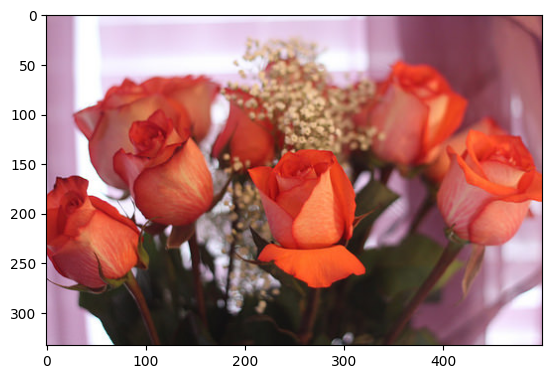

<Figure size 1000x200 with 0 Axes>

In [9]:
plt.imshow(roseArray)
plt.figure(figsize=(10, 2))

In [39]:
flowers_labels_dict = {
    0:'roses',
    1:'daisy',
    2:'dandelion',
    3:'sunflowers',
    4:'tulips'
}

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}#very important for to make map all image to easily convert into array and make label

In [12]:
#THis will convert the image into array
img = cv2.imread(str(flowers_images_dict['roses'][0]))#This is the function that convert the image int array acpect the str
img.shape,type(img)

((240, 179, 3), numpy.ndarray)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
#preparing the dataset for this  first all image get push into the map for easier label and the conversion----->very important

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
x = np.array(X)
y = np.array(y)

In [16]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [18]:
x_train=X_train/255
x_test=X_test/255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)#Number of classes or flower
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=20)  

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.2949 - loss: 1.7642
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.6113 - loss: 0.9905
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.6844 - loss: 0.8368
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.7805 - loss: 0.5935
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.8513 - loss: 0.4136
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.9290 - loss: 0.2083
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.9728 - loss: 0.1034
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.9882 - loss: 0.0514
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.9789 - loss: 0.0774
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.9809 - loss: 0.0830
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.9878 - loss: 0.0423
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17

In [21]:
model.evaluate(x_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6278 - loss: 2.8030


[2.8843061923980713, 0.6294277906417847]

Doing the augumentation

In [32]:
x_test.shape

(734, 180, 180, 3)

In [43]:
temp=model.predict(np.expand_dims(x_test[545],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [44]:
flowers_labels_dict[np.argmax(temp)]

'roses'

In [45]:
flowers_labels_dict[y_test[545]]

'roses'

print(Makking the Data Augumentation)

In [48]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=20)  

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.3087 - loss: 1.7691
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.5332 - loss: 1.1184
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.6252 - loss: 0.9887
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.6379 - loss: 0.9044
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.6624 - loss: 0.8486
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.6901 - loss: 0.7986
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.7094 - loss: 0.7436
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.7156 - loss: 0.7344
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.7346 - loss: 0.6832
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.7524 - loss: 0.6471
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.7631 - loss: 0.6508
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21

In [50]:
model.evaluate(x_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6924 - loss: 0.8868


[0.8919080495834351, 0.7002725005149841]